# Reproduce S. K. Matam, et. al, Catalysts 2020, 10(12), 1370

This notebook demonstrates reproducing the XAS results of the paper with [Larch](https://xraypy.github.io/xraylarch/xafs/) using the corresponding published dataset (raw data). 

S. K. Matam, C. Moffat, P. Hellier, M. Bowker, I. P. Silverwood, C. R. A. .Catlow, S. D. Jackson, J. Craswell, P. P. Wells, S. F. Parker, E. K. Gibson (2021). **Investigation of MoOx/Al2O3 under Cyclic Operation for Oxidative and Non-Oxidative Dehydrogenation of Propane** DOI: [10.3390/catal10121370](https://doi.org/10.3390/catal10121370).

- **Corresponding authors**:  Emma K. Gibson
- **E-mails**: 

The data used for reproducing the results was published in the Enlighten Research Data Repository of the University of Glasgow [doi:10.5525/gla.researchdata.1092](http://dx.doi.org/10.5525/gla.researchdata.1092)

For more details about Larch, see [Larch Website](https://xraypy.github.io/xraylarch/xafs/)

## Reproducing XAS analysis

The XAS results of the paper are in [Figure 2](https://www.mdpi.com/2073-4344/10/12/1370), and [Table 1](https://www.mdpi.com/2073-4344/10/12/1370). 

The captions and metadata for each can be used for reproducing the results presented.

#### Figure Captions
>Figure 2. In situ X-ray Absorption Near Edge Structure (XANES) spectra of MoOx/Al2O3 at 500 °C during oxidative and non-oxidative dehydrogenation of propane cycle (A) and the change in the position of the edge energy of the XANES during on stream of the reaction cycle (B). XANES spectra and edge energies of the reference compounds MoO3, Fe2(MoO4)3 and MoO2 are also included. 
>
>Table 1. Extended X-ray Absorption Fine Structure (EXAFS) fitting parameters 1 for the spectra collected at the end of step of the reaction cycle. 

#### Metadata (ReadMe_1092.docx)
>XAFS data
>The XAFS raw data files are numbered according to the list below and can be found in the zip file ‘MoOx_Al2O3 XAFS >data’. These files were imported into Athena, where they were aligned to the Mo foil reference also included in these >raw data files. Origin was then used to produce the figures in the paper.
>
>|Starting file number |Experimental conditions|
|:--------------------|:----------------------|
|172091               |500C Helium  |
|172097               |1st ODP step |
|172137               |O2/He        |
|172179               |Propane dehydrogenation|
|172231               |2nd OPD step|



In [1]:
# Library with the functions that replicate athena:
# normalisation, merging, re-binning, 
# and visualisation (plotting)
import lib.manage_athena as athenamgr  

# File handling
from pathlib import Path

#plotting library
import matplotlib.pyplot as plt
# inline: shows plot in notebook
# tk: shows plot in popup
%matplotlib inline 

# custom plotting functions
import paper03_plots as c_plot3 # paper 3 has some similar plots

# custom plotting functions
import paper05_plots as c_plot 

In [40]:
def normal_plot(athena_group, xlim=[],ylim=[], s_legend = True, x_off = 10.0, y_off= 0.1 ):
    plt.plot(athena_group.energy+x_off,
                  athena_group.norm+y_off, 
                  label=athena_group.filename,
                  #color = include_group[0],
                  #linestyle = include_groups[a_group][1]
                 )                 
    if s_legend:
        plt.legend() # show legend
        plt.ylabel("Normalized Absorption (a.u.)")
        plt.xlabel("Energy (eV)")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.tick_params(axis='both', which='major', labelsize=9)
    return plt

In [25]:
data_path = Path("C:\harwell\PSDI_test\wf_data\pub_665\DS0463\MoOx_Al2O3_XAFS_data")

# define mappings:
data_mappings={'500C Helium': '172091*.dat',
               'Fe2(MoO4)3': '172092*.dat',
               'Dried MoOx': '172093*.dat',
               'Emd 1stODH': '172094*.dat',
               'Reactovatopm': '172095*.dat',
               '1st ODP step (4 min)': '172097*.dat',
               '8 min Propane': '172098*.dat',
               '10 min Propane': '172099*.dat',
               '22 min Propane': '172102*.dat',
               '34 min Propane': '172103*.dat',
               '50 min Propane': '172104*.dat',
               '58 min End Propane': '172105*.dat',
               'O2/He': '172137*.dat',
               'Propane dehydrogenation': '172179*.dat',
               '2nd OPD step': '172231*.dat',
               '6 min 2nd ODP': '172235*.dat',
               '8 min 2nd ODP': '172236*.dat',
               '10 min 2nd ODP': '172237*.dat',
               '14 min 2nd ODP': '172238*.dat',
               '19 min 2nd ODP': '172239*.dat',
               'MoO2': '172246*.dat',
              }
# Output prefix
f_prefix = "MoOx_Al"

# Labels for data in .dat files
               #"0             1    2  3  4    5      6       
               #"qexafs_energy time I0 It Iref lnI0It lnItIref
               #"0      1    2  3  4    5  6"
column_labels = "energy time I0 It Iref mu muref"
files_list =[]
sample_list = []
for i_count, a_file  in enumerate(data_mappings):
    files_list += athenamgr.get_files_list(data_path, data_mappings[a_file])
    #data_prj = athenamgr.read_project(a_file)
    #for a_group_name in data_prj._athena_groups.keys():
    #    print(a_group_name)
    
for i_count, a_file  in enumerate(files_list):
    file_name = a_file.name
    f_suffix = str(i_count).zfill(4) 
    p_name = f_prefix+f_suffix
    #p_path = Path(out_path , p_name + ".prj")
    a_group = athenamgr.read_text(a_file, column_labels)
    a_group.label = list(data_mappings.keys())[i_count]
    a_group.filename = list(data_mappings.keys())[i_count]
    sample_list.append(a_group)
    
athenamgr.save_groups(sample_list, "read_results.prj")

In [26]:
sample_list

[<Group ascii_file C:\harwell\PSDI_test\wf_data\pub_665\DS0463\MoOx_Al2O3_XAFS_data\172091_MoOx_Al2O3_1.dat>,
 <Group ascii_file C:\harwell\PSDI_test\wf_data\pub_665\DS0463\MoOx_Al2O3_XAFS_data\172092_MoOx_Al2O3_2.dat>,
 <Group ascii_file C:\harwell\PSDI_test\wf_data\pub_665\DS0463\MoOx_Al2O3_XAFS_data\172093_MoOx_Al2O3_3.dat>,
 <Group ascii_file C:\harwell\PSDI_test\wf_data\pub_665\DS0463\MoOx_Al2O3_XAFS_data\172094_MoOx_Al2O3_4.dat>,
 <Group ascii_file C:\harwell\PSDI_test\wf_data\pub_665\DS0463\MoOx_Al2O3_XAFS_data\172095_MoOx_Al2O3_5.dat>,
 <Group ascii_file C:\harwell\PSDI_test\wf_data\pub_665\DS0463\MoOx_Al2O3_XAFS_data\172097_MoOx_Al2O3_actif_2.dat>,
 <Group ascii_file C:\harwell\PSDI_test\wf_data\pub_665\DS0463\MoOx_Al2O3_XAFS_data\172098_MoOx_Al2O3_actif_3.dat>,
 <Group ascii_file C:\harwell\PSDI_test\wf_data\pub_665\DS0463\MoOx_Al2O3_XAFS_data\172099_MoOx_Al2O3_actif_4.dat>,
 <Group ascii_file C:\harwell\PSDI_test\wf_data\pub_665\DS0463\MoOx_Al2O3_XAFS_data\172102_MoOx_Al2O3_

['I0', 'Iref', 'It', 'args', 'array_labels', 'atsym', 'attrs', 'callargs', 'd2mude', 'data', 'dmude', 'e0', 'edge', 'edge_step', 'edge_step_poly', 'energy', 'filename', 'flat', 'header', 'i0', 'journal', 'label', 'mu', 'muref', 'norm', 'norm_poly', 'path', 'post_edge', 'pre_edge', 'pre_edge_details', 'sel', 'signal', 'time', 'x', 'y']


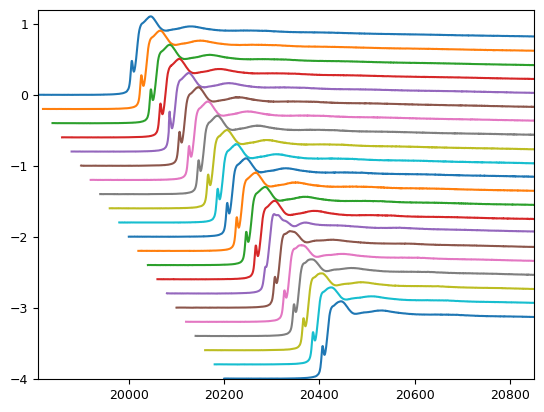

In [47]:
data_prj = athenamgr.read_project("read_results.prj")
for mult, a_group in enumerate(data_prj.groups):
    a_group=athenamgr.get_group(data_prj, a_group)

    #print(a_group.e0)
    plt = normal_plot(a_group, [19810,20450+mult*20],[-.01-mult*0.2 ,1.2],False, mult*20, -mult*0.2)
print (dir(sample_list[0]))

In [ ]:
 dir(data_prj.groups)

### Figure 1 XANES spectra of Pd/Al2O3


In [ ]:
data_path = Path("C:/harwell/PSDI_test/wf_data/pub_661/DS0462")

xanes_01 = {"project_file": "100C.prj",
            "mappings":{"Reduced Sample": "Pos_0_5_100C_After_Reduction",
                        "PdO": "PdO_standard",
                        "Pd Foil":"Pd_Foil"}}

data_file = Path(data_path, xanes_01['project_file'])
xanes_01_groups = c_plot.get_groups(data_file,xanes_01["mappings"])


#define dict to set colours and line stiles
plot_groups = {"Reduced Sample":["blue", "solid"], 
               "Pd Foil":['red', "dotted"],
               "PdO":["green", "dotted"], 
               }

# PDO may need to be aligned to same e0 as the other 2
print("e0 Red. Sample:", list(xanes_01_groups.values())[0].e0,
      "e0 Pd Foil:", list(xanes_01_groups.values())[2].e0,
      "e0 PdO:", list(xanes_01_groups.values())[1].e0)

xanes_01_groups["PdO"] = athenamgr.recalibrate_energy(xanes_01_groups["PdO"], xanes_01_groups["Reduced Sample"].e0)

plt = c_plot3.plot_normalised(xanes_01_groups, plot_groups,(6.25,5),[24300, 24450],[0,1.2])
plt.show()

# deviation from metadata:
#  - recalibration to e0
#  - using Pos_0_5_100C_After_Reduction from 100C.prj instead of merge
#    of signals from He_after_reduction.prj (equivalent result tested
#    in atehena)

### Figure 2a XANES spectra of Pd/Al2O3 at 100 °C


In [ ]:
# individaul normal plots
def normal_subplot(a_subplt, athena_groups = {}, include_groups = {}, xlim=[],ylim=[], s_legend = True):
    for g_indx, a_group in enumerate(include_groups):
        a_subplt.plot(athena_groups[a_group].energy,
                      athena_groups[a_group].norm, 
                      label=athena_groups[a_group].filename,
                      color = include_groups[a_group][0],
                      linestyle = include_groups[a_group][1]
                     )                 
    if s_legend:
        a_subplt.legend() # show legend
        a_subplt.set_ylabel("Normalized Absorption (a.u.)")
        a_subplt.set_xlabel("Energy (eV)")
    a_subplt.set_xlim(xlim)
    a_subplt.set_ylim(ylim)
    a_subplt.tick_params(axis='both', which='major', labelsize=9)
    return a_subplt

# normal plot with inset closeup
def plot_normal_w_inset(main_groups = {}, main_include = {}, aspect=(6,8),
                        lp_xlim=[], lp_ylim=[], 
                        inset_groups = {}, inset_include = {}, 
                        sp_xlim=[],  sp_ylim=[]
                       ):
    fig, ax1 = plt.subplots(figsize=aspect)
    # These are in unitless percentages of the figure size. (0,0 is bottom left)
    left, bottom, width, height = [0.48, 0.2, 0.4, 0.4]
    ax2 = fig.add_axes([left, bottom, width, height])

    ax1 = normal_subplot(ax1, main_groups, main_include, lp_xlim,lp_ylim)
    ax2 = normal_subplot(ax2, inset_groups, inset_include, sp_xlim,sp_ylim, True)
    return plt


In [ ]:
data_path = Path("C:/harwell/PSDI_test/wf_data/pub_661/DS0462")

xanes_02 = {"project_file": "100C.prj",
            "mappings":{"Pos 0": "Pos_0pt5",
                        "Pos 1": "Pos_1pt5",
                        "Pos 2": "Pos_2pt5",
                        "Pos 3": "Pos_3pt5",
                        "Pos 4": "Pos_4pt5",
                        "Pos 5": "Pos_5pt5",
                        "Pos 6": "Pos_6pt5",
                        "Pos 7": "Pos_7pt5",
                        "Pos 8": "Pos_8pt5",
                        "Reduced Sample": "Pos_0_5_100C_After_Reduction",
                        "PdO": "PdO_standard",
                        "Pd Foil":"Pd_Foil"}}

data_file = Path(data_path, xanes_02['project_file'])

xanes_02_groups = c_plot.get_groups(data_file,xanes_02["mappings"])


#define dict to set colours and line stiles
main_groups = {"Pos 0": ["black", "solid"],
               "Pos 8": ["purple", "solid"],
               "Reduced Sample":["blue", "solid"], 
               "Pd Foil":['red', "dotted"],
               "PdO":["green", "dotted"], 
               }

inset_groups ={"Pos 0": ["black", "solid"],
               "Pos 1": ["blue", "solid"],
               "Pos 2": ["red", "solid"],
               "Pos 3": ["green", "solid"],
               "Pos 4": ["yellow", "solid"],
               "Pos 5": ["orange", "solid"],
               "Pos 6": ["cyan", "solid"],
               "Pos 7": ["lime", "solid"],
               "Pos 8": ["pink", "solid"],
               }

# PDO may need to be recalibrated to same e0 as the other 2
print("e0 Red. Sample:", list(xanes_01_groups.values())[0].e0,
      "e0 Pd Foil:", list(xanes_01_groups.values())[2].e0,
      "e0 PdO:", list(xanes_01_groups.values())[1].e0)

xanes_02_groups["PdO"] = athenamgr.recalibrate_energy(xanes_02_groups["PdO"], xanes_02_groups["Pd Foil"].e0)

plt = plot_normal_w_inset(xanes_02_groups, main_groups, (8.5,8), [24300, 24450], [0,1.2], 
                          xanes_02_groups, inset_groups, [24340, 24400], [0,1.2])
plt.show()

# deviation from metadata:
#  - recalibration to e0
#  - the diagram on the paper is missing Pos 7, and
#    100C.prj is missing Pos 9 and Pos 10 

### Figure 2b intensity of XANES at the whiteline (24 368 eV) and at the PdNx peak (24 388 eV) 

In [ ]:
import numpy as np

e_values = [24368,24388]

square = '$\u25A0$'
circle = '$\u25CF$'

markers={24368:[square,"g","g",5],
         24388:[circle,"r","r",5]}

positions ={}
for e_value in e_values:
    positions[e_value] = {}
    for g_indx, a_group in enumerate(inset_groups):
        # get the index of the energy value closer to e_value
        e_idx = np.abs(xanes_02_groups[a_group].energy - e_value).argmin()
        positions[e_value][g_indx] = xanes_02_groups[a_group].norm[e_idx]
        
for a_position in positions:
    plt.plot(positions[a_position].keys(), positions[a_position].values(), marker=markers[a_position][0], 
             markerfacecolor=markers[a_position][1], markeredgecolor=markers[a_position][2],
             markersize=markers[a_position][3], 
             linestyle='none', label="Signal at " + str(a_position) + "eV" )
    
plt.ylabel("Signal Intensity (a.u.)")
plt.xlabel("Position along the bed (mm)")
plt.legend(loc='center')

### Figure 2c Pd−Pd and Pd−N coordination number obtained from EXAFS fit.
For this plot we need to do a fit o two paths to the all the position samples.
Two crystal structures are required for fitting: AlPdO3 and NPd,. The crystal structures were obtained from materials project and CCDC. The name of the paths to select are those used in the figure caption (Pd-Pd and Pd-N). Additionally Pd-O was also used to obtain a better fit. 

The figure presents the results of 10 fittings but since all are fitted to the same crystal common variables are defined for: 
- set of GDS parameters
- set of paths
- set of fit variables

The method for calculating the coordination numbers is described in the [Larch documentation](https://xraypy.github.io/xraylarch/xafs_feffit.html#example-4-measuring-coordination-number). 

Atoms and FEFF however can be shared for the four fittings so they are executed in the next cell

In [ ]:
# Library with the functions that execute 
# Atoms and FEFF to generate scattering paths
import lib.atoms_feff as feff_runner     

# Set parameters          
# library containign functions tho manage fit, at read, write 
# GDS parameters, and scattering paths. 
import lib.manage_fit as fit_manager  

from larch import Interpreter
session = Interpreter()


# all crystals are added to a subfolder named additional
crystal_files = ["additional/mp-1178574_AlPdO3.cif",
                 "additional/1694754.cif",] 

for idx, a_file in enumerate(crystal_files):
    crystal_files[idx] = data_path / a_file

# Need to specify the absorbing atom and maximum radius
absorbing_atoms = ["Pd","Pd",]
max_radius = 5.0

# run feff and get a list of feff dirs
feff_dirs = feff_runner.run_feff(crystal_files, absorbing_atoms, max_radius) 

# could prevent running if the files still exist and they are recent (<month old)

In [ ]:
gds_parms = "pdo_gds.csv"
sel_paths = "pdo_sp.csv"

# variables for fit
fit_vars = {}
fit_vars['fitspace']='k'
fit_vars['kmin']=0 
fit_vars['kmax']=10
fit_vars['kw']=2 
fit_vars['dk']=1
fit_vars['window']='hanning'
fit_vars['rmin']=0.0
fit_vars['rmax']=5.0

In [ ]:
# read save parameters from input gds file
gds = fit_manager.read_gds(gds_parms, session)
# show gsd group parameters in a spreadsheet
this_sheet = fit_manager.show_gds(gds)
# save gsd group parameters in a csv file
fit_manager.save_gds(gds, gds_parms)

In [ ]:
# save gds data the csv file 
gds = fit_manager.spreadsheet_to_gds(this_sheet, session)
# save gsd group parameters in a csv file
fit_manager.save_gds(gds, gds_parms)

In [ ]:
# read saved selected paths from input file
selected_paths = fit_manager.read_selected_paths_list(sel_paths, session)

path_sheet = fit_manager.show_feff_paths(crystal_files,selected_paths)
display(path_sheet)

In [ ]:
sp_sheet = fit_manager.show_selected_paths(path_sheet, selected_paths)


In [ ]:
fit_manager.save_selected_paths_list(sp_sheet, sel_paths)
selected_paths = fit_manager.read_selected_paths_list(sel_paths, session)

# hack set degen = 1 for all paths
for a_path in selected_paths:
    a_path.degen = 1


In [ ]:
# list all the groups to be fitted
fit_groups ={"Pos 0": ["black", "solid"],
               "Pos 1": ["blue", "solid"],
               "Pos 2": ["red", "solid"],
               "Pos 3": ["green", "solid"],
               "Pos 4": ["yellow", "solid"],
               "Pos 5": ["orange", "solid"],
               "Pos 6": ["cyan", "solid"],
               "Pos 7": ["lime", "solid"],
               "Pos 8": ["pink", "solid"],
               }

# run fit
fit_list = {}
for a_group in fit_groups:
    trans, dset, out = fit_manager.run_fit(xanes_02_groups[a_group], gds, selected_paths, fit_vars, session)
    fit_list[a_group]=[trans, dset, out]
    

# import custom plot functions (replicate plots in paper)
import paper01_plots as c_plots
for a_fit in fit_list:
    chikr_p = c_plot.plot_dashed_fit(fit_list[a_fit][1], fit_vars['rmin'],
                                     fit_vars['rmax'],fit_vars['kmin'] ,
                                     fit_vars['kmax'], a_fit)
chikr_p.show()

In [ ]:
for a_fit in fit_list:
    print("R-factor %.2f"%(fit_list[a_fit][2].rfactor*100)+"%")

In [ ]:
paths_w_cn =["PdPd","PdN"]

markers={"PdPd":[square,"g","g",5],
         "PdN":[circle,"r","r",5]}
errors = {"PdPd":[], "PdN":[]}

cn_positions ={"PdPd":{},"PdN":{}}

for idx, a_fit in enumerate(fit_list):
    cn_positions["PdPd"][idx] = abs(fit_list[a_fit][2].params['n1_pdpd'].value)
    err = str(fit_list[a_fit][2].params['n1_pdpd'])
    errors["PdPd"].append(float(err[err.find('+/-')+4:].split(",")[0]))
    cn_positions["PdN"][idx] = abs(fit_list[a_fit][2].params['n3_pdn'].value)
    err = str(fit_list[a_fit][2].params['n3_pdn'])
    errors["PdN"].append(float(err[err.find('+/-')+4:].split(",")[0]))
    

for a_position in cn_positions:
    plt.plot(cn_positions[a_position].keys(), cn_positions[a_position].values(), marker=markers[a_position][0], 
             markerfacecolor=markers[a_position][1], markeredgecolor=markers[a_position][2],
             markersize=markers[a_position][3], 
             linestyle='none', label = str(a_position))
    plt.errorbar(cn_positions[a_position].keys(), cn_positions[a_position].values(), yerr=errors[a_position],
                 linestyle='none',capsize= 5)
    
plt.ylabel("Coordination Number")
plt.xlabel("Position along the bed (mm)")
plt.legend(loc='center')


In [ ]:
import re
cn_positions ={"PdPd":{},"PdN":{}}
cn_errors = {"PdPd":[],"PdN":[]}

path_keys = {"  n1_pdpd   ":"PdN",  "  n3_pdn   " :"PdPd"}

found_key = False
this_key = ""
for idx, a_fit in enumerate(fit_list):
    fit_report = fit_manager.get_fit_report(fit_list[a_fit][2], session)
    for a_line in fit_report.split("\n"):
        for a_key in path_keys:
            if a_key in a_line:
                #print(a_line)
                all_vals = re.findall(r"[-+]?(?:\d*\.*\d+)", a_line) 
                #print (all_vals)
                cn_positions[path_keys[a_key]][idx] = abs(float(all_vals[1]))
                cn_errors[path_keys[a_key]].append(float(all_vals[2]))


for a_position in cn_positions:
    plt.plot(cn_positions[a_position].keys(), cn_positions[a_position].values(), marker=markers[a_position][0], 
             markerfacecolor=markers[a_position][1], markeredgecolor=markers[a_position][2],
             markersize=markers[a_position][3], 
             linestyle='none', label = str(a_position))
    plt.errorbar(cn_positions[a_position].keys(), cn_positions[a_position].values(), yerr=errors[a_position],
                 linestyle='none',capsize= 5)
    
plt.ylabel("Coordination Number")
plt.xlabel("Position along the bed (mm)")
plt.legend(loc='center')


### Figure 2d Pd−Pd and Pd−N distances obtained from EXAFS fit.

For this plot we use the same results from the fits above. In this case we take the r reported for each of the two paths of interest: Pd-Pd and Pd-N.

The script below looks up the report for the path labels and then for the value of R. The values are stored in two arrays which are then plotted.


In [ ]:
r_positions ={"PdPd":{},"PdN":{}}
r_errors = {"PdPd":[],"PdN":[]}
path_keys = {"N.Pd.1":"PdN","Pd.Pd.2":"PdPd"}

found_key = False
this_key = ""
for idx, a_fit in enumerate(fit_list):
    fit_report = fit_manager.get_fit_report(fit_list[a_fit][2], session)
    for a_line in fit_report.split("\n"):
        for a_key in path_keys:
            if a_key in a_line:
                found_key = True
                this_key = a_key
        if found_key and '  r  ' in a_line:
            all_vals = re.findall(r"[-+]?(?:\d*\.*\d+)", a_line)
            r_positions[path_keys[this_key]][idx] = float(all_vals[0])
            r_errors[path_keys[this_key]].append(float(all_vals[1]))
            found_key = False
            this_key = ""
       


for a_position in r_positions:
    plt.plot(r_positions[a_position].keys(), r_positions[a_position].values(), marker=markers[a_position][0], 
             markerfacecolor=markers[a_position][1], markeredgecolor=markers[a_position][2],
             markersize=markers[a_position][3], 
             linestyle='none', label = str(a_position))
    plt.errorbar(r_positions[a_position].keys(), r_positions[a_position].values(), yerr=r_errors[a_position],
                 linestyle='none',capsize= 5)
    
plt.ylabel("Coordination Number")
plt.xlabel("Position along the bed (mm)")
plt.legend(loc='center')

### Figure 4a XANES spectra of Pd/Al2O3 under reaction condition, 175 °C, for the front and the end of the bed, compared to Pd foil and PdO reference;


In [ ]:
xanes_04 = {"project_file": "175C.prj",
            "mappings":{"Pos 0": "Pos_0pt5",
                        "Pos 1": "Pos_1pt5",
                        "Pos 2": "Pos_2pt5",
                        "Pos 3": "Pos_3pt5",
                        "Pos 4": "Pos_4pt5",
                        "Pos 5": "Pos_5pt5",
                        "Pos 6": "Pos_6pt5",
                        "Pos 7": "Pos_7pt5",
                        "Pos 8": "Pos_8pt5",
                        "Reduced Sample": "d_0pt5_100_He_after_reduction",
                        "PdO": "PdO_standard",
                        "Pd Foil":"Pd_Foil"}}

data_file = Path(data_path, xanes_04['project_file'])

xanes_04_groups = c_plot.get_groups(data_file,xanes_04["mappings"])


#define dict to set colours and line stiles
main_groups = {"Pos 0": ["black", "solid"],
               "Pos 8": ["purple", "solid"],
               "PdO":["green", "dotted"],
               "Pd Foil":['red', "dotted"],
               }

inset_groups ={"Pos 0": ["black", "solid"],
               "Pos 1": ["blue", "solid"],
               "Pos 2": ["red", "solid"],
               "Pos 3": ["green", "solid"],
               "Pos 4": ["yellow", "solid"],
               "Pos 5": ["orange", "solid"],
               "Pos 6": ["cyan", "solid"],
               "Pos 7": ["lime", "solid"],
               "Pos 8": ["pink", "solid"],
               }

# PDO may need to be recalibrated to same e0 as the other 2
print("e0 Red. Sample:", list(xanes_04_groups.values())[0].e0,
      "e0 Pd Foil:", list(xanes_04_groups.values())[2].e0,
      "e0 PdO:", list(xanes_04_groups.values())[1].e0)

align_e0 = xanes_04_groups["PdO"].e0
for a_group in xanes_04_groups:
    xanes_04_groups[a_group] = athenamgr.recalibrate_energy(xanes_04_groups[a_group], align_e0)

plt = plot_normal_w_inset(xanes_04_groups, main_groups, (8.5,8), [24300, 24450], [0,1.2], 
                          xanes_04_groups, inset_groups, [24340, 24400], [0,1.2])
plt.show()

# deviation from metadata:
#  - recalibration to e0
#  - the diagram on the paper is missing Pos 7, and
#    100C.prj is missing Pos 9 and Pos 10 

### Figure 4a XANES spectra of Pd/Al2O3 under reaction condition, 175 °C, for the front and the end of the bed, compared to Pd foil and PdO reference;


In [ ]:
xanes_04 = {"project_file": "175C.prj",
            "mappings":{"Pos 0": "Pos_0pt5",
                        "Pos 1": "Pos_1pt5",
                        "Pos 2": "Pos_2pt5",
                        "Pos 3": "Pos_3pt5",
                        "Pos 4": "Pos_4pt5",
                        "Pos 5": "Pos_5pt5",
                        "Pos 6": "Pos_6pt5",
                        "Pos 7": "Pos_7pt5",
                        "Pos 8": "Pos_8pt5",
                        "Reduced Sample": "d_0pt5_100_He_after_reduction",
                        "PdO": "PdO_standard",
                        "Pd Foil":"Pd_Foil"}}

data_file = Path(data_path, xanes_04['project_file'])

xanes_04_groups = c_plot.get_groups(data_file,xanes_04["mappings"])


#define dict to set colours and line stiles
main_groups = {"Pos 0": ["black", "solid"],
               "Pos 8": ["purple", "solid"],
               "PdO":["green", "dotted"],
               "Pd Foil":['red', "dotted"],
               }

inset_groups ={"Pos 0": ["black", "solid"],
               "Pos 1": ["blue", "solid"],
               "Pos 2": ["red", "solid"],
               "Pos 3": ["green", "solid"],
               "Pos 4": ["yellow", "solid"],
               "Pos 5": ["orange", "solid"],
               "Pos 6": ["cyan", "solid"],
               "Pos 7": ["lime", "solid"],
               "Pos 8": ["pink", "solid"],
               }

# PDO may need to be recalibrated to same e0 as the other 2
print("e0 Red. Sample:", list(xanes_04_groups.values())[0].e0,
      "e0 Pd Foil:", list(xanes_04_groups.values())[2].e0,
      "e0 PdO:", list(xanes_04_groups.values())[1].e0)

align_e0 = xanes_04_groups["PdO"].e0
for a_group in xanes_04_groups:
    xanes_04_groups[a_group] = athenamgr.recalibrate_energy(xanes_04_groups[a_group], align_e0)

plt = plot_normal_w_inset(xanes_04_groups, main_groups, (8.5,8), [24300, 24450], [0,1.2], 
                          xanes_04_groups, inset_groups, [24340, 24400], [0,1.2])
plt.show()

# deviation from metadata:
#  - recalibration to e0
#  - the diagram on the paper is missing Pos 7, and
#    100C.prj is missing Pos 9 and Pos 10 

## Reproducibility of results

All of the results can be reproduced. however there is a small issue regarding which crystal files to use. These are not included in the published dataset.

Pending contactiong authors for validation of process.


Issues:
1. data sets for 100C, only 8 are included in prj, could they be mislabelled? what happened to sample at position 7?
2. Method to calculate coordination numbers (is it correct?)
3. Method to get R for each path from report?
4. need to reaearch the method for MCR and see if it can be supported with Larch (4b,4c,4d,).
